In [1]:
import pandas as pd 
import json 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

with open('./results/NN/model_accuracies.json', 'r') as f:
    results = json.load(f)
results = pd.DataFrame(results)

In [6]:
parameters = {
    'model_type': 'renato', # regressor or classifier
    'use_trap_info': True, # True or False
    'ntraps': 3, #int
    'lags': 3, #int
    'random_split': True, # True or False
    'test_size': 0.2, # float [0,1]
    'scale': False, # True or False
    'learning_rate': 1e-3, # float
    'batch_size': 64, # int
    'epochs': 5    # int
}
mt = parameters['model_type']
result_list = results[results['parameters'] == parameters][['accuracy','loss','ytest','yhat','repetition']]



In [7]:
result_list

,accuracy,loss,ytest,yhat,repetition
43,"[[0.6740293511073916, 0.6793944466031024, 0.68...","[[0.6270640975373653, 0.6166120835403639, 0.63...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",1


Accuracy

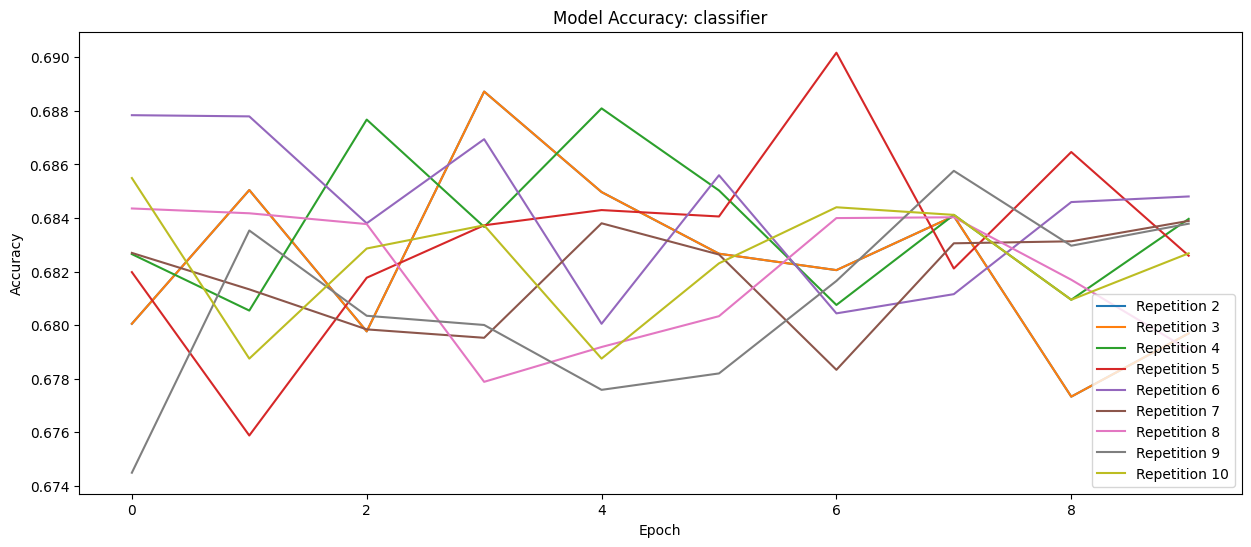

In [72]:
if mt == 'renato':
    


plt.figure(figsize=(15, 6))  
for _,row in result_list[['accuracy','repetition']][1:].iterrows():   
    acc = list(map((lambda x: x/100 if x > 1 else x),row['accuracy']))

    plt.plot(acc, label='Repetition {}'.format(row['repetition']))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Model Accuracy: {mt}')

plt.show()
    

Output

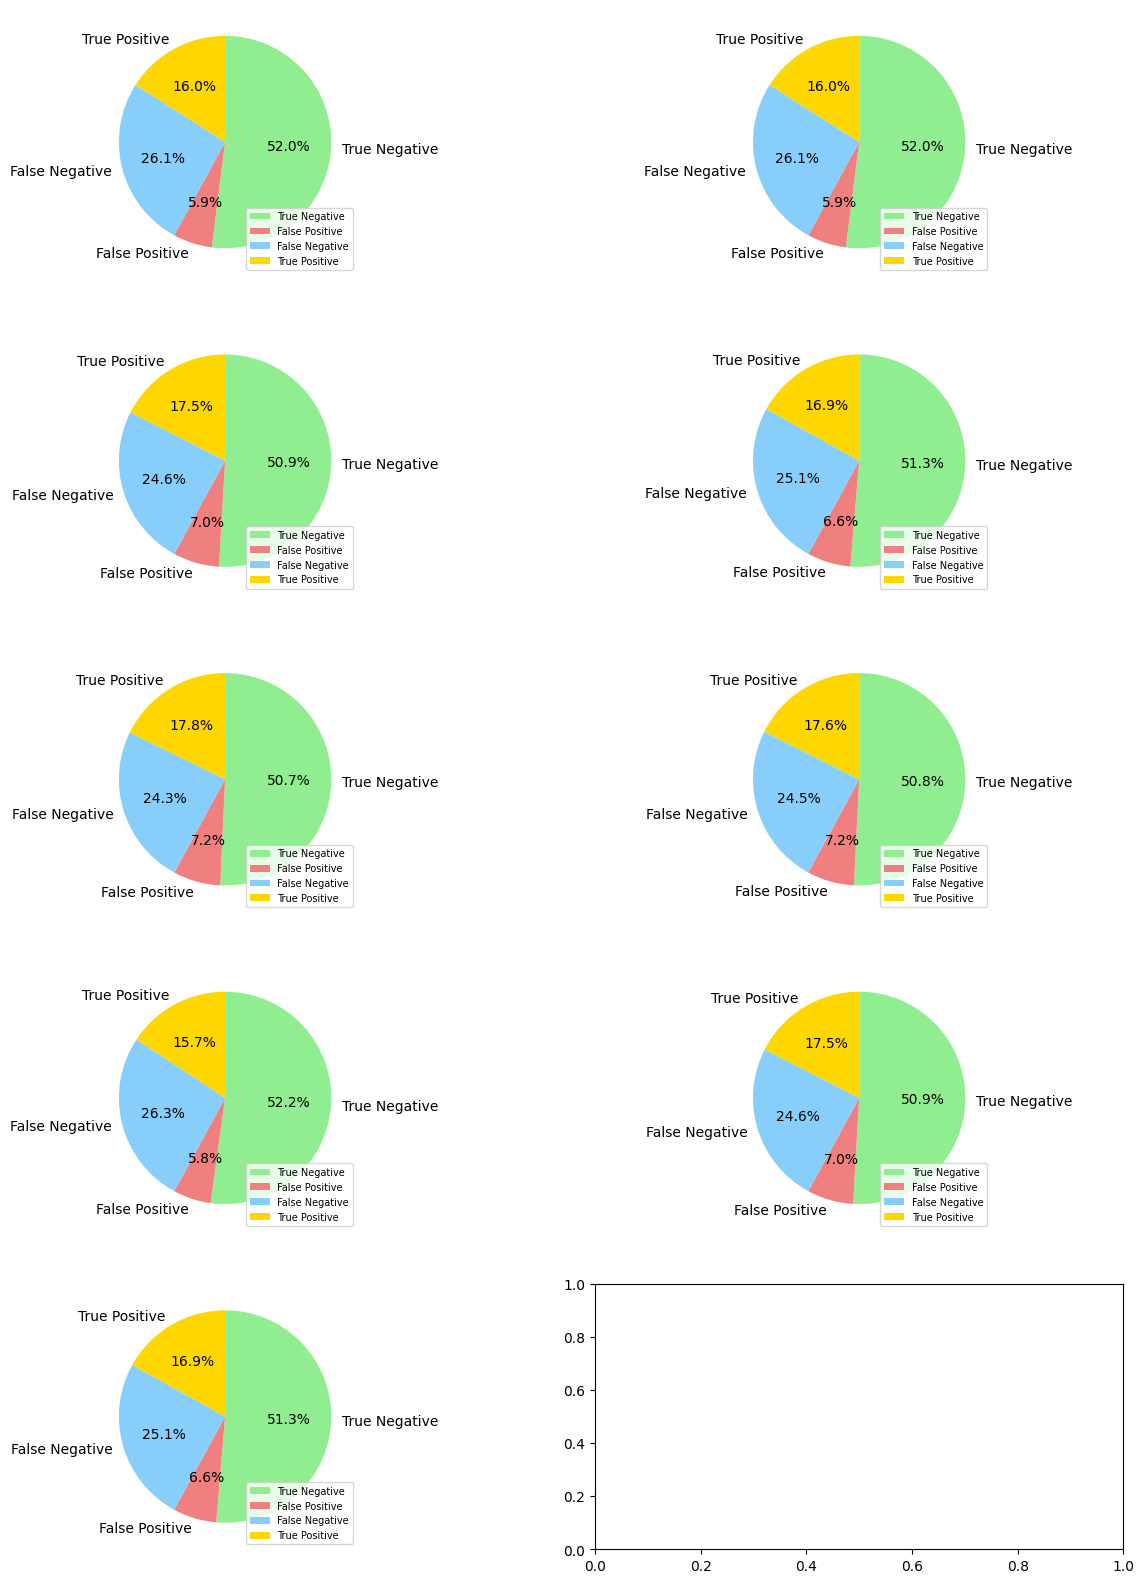

In [84]:
fig, ax = plt.subplots(result_list.shape[0]//2, 2, figsize=(15, 20))  # Create a figure and an axes
j = 1 #plot index
count = 0

for _,row in result_list[['yhat','ytest','repetition']][1:].iterrows():   
    j = abs(j-1) # 0 or 1
    if mt == 'regressor':
        ax[count,j].plot(row['ytest'], label='True')
        ax[count,j].plot(row['yhat'], label='Predicted')
    if mt == 'classifier':
        cm = confusion_matrix(row['ytest'], row['yhat'])
        cm_flat = cm.flatten()

        # Labels for the pie chart
        labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
        colors = ['lightgreen', 'lightcoral', 'lightskyblue', 'gold']
        ax[count,j].pie(cm_flat, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, counterclock=False)


        


    ax[count,j].legend(loc="lower right", prop={'size': 7})
    count += j

    
    

Loss Function

In [8]:
plt.figure(figsize=(1, 6))  
for _,row in result_list[['loss','repetition']][1:].iterrows():   
    acc = row['loss']
    plt.plot(acc, label='Repetition {}'.format(row['repetition']))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Model Loss: {mt}')

plt.show()
    

<Figure size 100x600 with 0 Axes>